In [1]:
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly==5.3.1
!pip install wordninja
!pip install pyspellchecker
!pip install pandas
!pip install seaborn
!pip install -U kaleido

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.4.24-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (763 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
You should consider upgrading via the '/home/am-i-helpful/PycharmProjects/SentimentAnalysisProducer/venv/bin/python -m pip install --upgrade pip' command.
  Using cached wordcloud-1.8.1-cp310-cp310-linux_x86_64.whl
     |████████████████████████████████| 3.1 MB 3.7 MB/s            
  Using cached matplotlib-3.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached numpy-1.22.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached kiwisolver-1.4.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.w

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [3]:
import glob
import os
file_dir = './archive'
files = glob.glob(os.path.join(file_dir, "*.csv"))
# Make a list of dataframes while adding a stick_ticker column
dataframes = [pd.read_csv(file, encoding='latin1').assign(vaccine_file=os.path.basename(file).strip(".csv")) for file in files]
# Concatenate all the dataframes into one
df = pd.concat(dataframes, ignore_index=True)
# df = pd.read_csv("vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
# dropna() for removing the missing values
df

id       tweetid  \
0             1  1.463114e+18   
1             2  1.463114e+18   
2             3  1.463114e+18   
3             4  1.463114e+18   
4             5  1.463114e+18   
...         ...           ...   
2999995   99996  1.469149e+18   
2999996   99997  1.469149e+18   
2999997   99998  1.469149e+18   
2999998   99999  1.469149e+18   
2999999  100000  1.469149e+18   

                                                      guid  \
0        https://twitter.com/pattcharre/statuses/146311...   
1        https://twitter.com/JCSEHUN94/statuses/1463113...   
2        https://twitter.com/enbebecart/statuses/146311...   
3        https://twitter.com/Enjolras_Hugo/statuses/146...   
4        https://twitter.com/H_Fennessy/statuses/146311...   
...                                                    ...   
2999995  https://twitter.com/phylogeo/statuses/14691487...   
2999996  https://twitter.com/eclamoureux/statuses/14691...   
2999997  https://twitter.com/PTheModel1/statuses/146914...   
2999998  https://twitter.com/yamada_mamiko/statuses/146...   
2999999  https://twitter.com/HumanAction76/statuses/146...   

                                                      link         author  \
0        https://twitter.com/pattcharre/statuses/146311...     pattcharre   
1        https://twitter.com/JCSEHUN94/statuses/1463113...      JCSEHUN94   
2        https://twitter.com/enbebecart/statuses/146311...     enbebecart   
3        https://twitter.com/Enjolras_Hugo/statuses/146...  Enjolras_Hugo   
4        https://twitter.com/H_Fennessy/statuses/146311...     H_Fennessy   
...                                                    ...            ...   
2999995  https://twitter.com/phylogeo/statuses/14691487...       phylogeo   
2999996  https://twitter.com/eclamoureux/statuses/14691...    eclamoureux   
2999997  https://twitter.com/PTheModel1/statuses/146914...     PTheModel1   
2999998  https://twitter.com/yamada_mamiko/statuses/146...  yamada_mamiko   
2999999  https://twitter.com/HumanAction76/statuses/146...  HumanAction76   

                                                     title  \
0        RT @yamyummy: à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à...   
1        RT @in_silence: à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹...   
2        cute ng fam ko bumili sila sakin ng toploader ...   
3        RT @CalaIris2: Un fumeur obÃ¨se de 60 ans vacc...   
4        It\'s such a game changer that it raises some ...   
...                                                    ...   
2999995  RT @cellhostmicrobe: âDirty miceâ as precl...   
2999996  "Vu Van Chinh, director of the Ha Trung Distri...   
2999997  @platanossoy The vaccine does not prevent you ...   
2999998  RT @GoodBye_Nuclear: å¾é ãæµ¸éããä¸ç...   
2999999  If you think showing an ID to vote is racism, ...   

                                               description  \
0        à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸...   
1        à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹à¸¡à¸¡à¸µà¸à¸²à...   
2        cute ng fam ko bumili sila sakin ng toploader ...   
3        Un fumeur obÃ¨se de 60 ans vaccinÃ© triple dos...   
4        It\'s such a game changer that it raises some ...   
...                                                    ...   
2999995  âDirty miceâ as preclinical vaccine testin...   
2999996  "Vu Van Chinh, director of the Ha Trung Distri...   
2999997  @platanossoy The vaccine does not prevent you ...   
2999998  å¾é ãæµ¸éããä¸çã®ä¸­ã§ãã¯ã¯ã...   
2999999  If you think showing an ID to vote is racism, ...   

                     pubdate               source  favorite_count  ...  \
0        2021-11-23 06:54:05   Twitter for iPhone               0  ...   
1        2021-11-23 06:54:04  Twitter for Android               0  ...   
2        2021-11-23 06:54:04  Twitter for Android               0  ...   
3        2021-11-23 06:54:04  Twitter for Android               0  ...   
4        2021-11-23 06:54:04      Twitter Web App               0  ...   
...         

In [4]:
print(df.columns)
print(df.shape)
df.info()

Index(['id', 'tweetid', 'guid', 'link', 'author', 'title', 'description',
       'pubdate', 'source', 'favorite_count', 'retweet_count', 'lang',
       'quoted_text', 'tweet_type', 'in_reply_to_screen_name',
       'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_screen_name',
       'retweeted_user_id', 'retweeted_status_id', 'user_id',
       'profile_image_url', 'user_statuses_count', 'user_friends_count',
       'user_followers_count', 'user_created_at', 'user_bio', 'user_location',
       'user_verified', 'Unnamed: 29', 'vaccine_file'],
      dtype='object')
(3000000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   tweetid                  float64
 2   guid                     object 
 3   link                     object 
 4   author                   object 
 5   title                 

In [5]:
# Data pre-processing
df.drop(columns=['id','tweetid','guid','link','source','lang',
       'quoted_text', 'tweet_type', 'in_reply_to_screen_name',
       'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_screen_name',
       'retweeted_user_id', 'retweeted_status_id', 'user_id',
       'profile_image_url', 'user_statuses_count', 'user_friends_count',
       'user_followers_count', 'user_created_at', 'user_bio', 'user_location',
       'user_verified','Unnamed: 29'], inplace=True)
df = df.drop_duplicates('description')
print(df.shape)

(961447, 7)


In [6]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

In [7]:
# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['description'].transform(clean_tweet_text)
df.head()

author                                              title  \
0     pattcharre  RT @yamyummy: à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à...   
1      JCSEHUN94  RT @in_silence: à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹...   
2     enbebecart  cute ng fam ko bumili sila sakin ng toploader ...   
3  Enjolras_Hugo  RT @CalaIris2: Un fumeur obÃ¨se de 60 ans vacc...   
4     H_Fennessy  It\'s such a game changer that it raises some ...   

                                         description              pubdate  \
0  à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸...  2021-11-23 06:54:05   
1  à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹à¸¡à¸¡à¸µà¸à¸²à...  2021-11-23 06:54:04   
2  cute ng fam ko bumili sila sakin ng toploader ...  2021-11-23 06:54:04   
3  Un fumeur obÃ¨se de 60 ans vaccinÃ© triple dos...  2021-11-23 06:54:04   
4  It\'s such a game changer that it raises some ...  2021-11-23 06:54:04   

   favorite_count  retweet_count vaccine_file  
0               0             97    accine 09  
1               0          35224    accine 09  
2               0              0    accine 09  
3               0            541    accine 09  
4               0              0    accine 09

In [8]:
df['date'] = pd.to_datetime(df['pubdate']).dt.date
df.head()

author                                              title  \
0     pattcharre  RT @yamyummy: à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à...   
1      JCSEHUN94  RT @in_silence: à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹...   
2     enbebecart  cute ng fam ko bumili sila sakin ng toploader ...   
3  Enjolras_Hugo  RT @CalaIris2: Un fumeur obÃ¨se de 60 ans vacc...   
4     H_Fennessy  It\'s such a game changer that it raises some ...   

                                         description              pubdate  \
0  à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸...  2021-11-23 06:54:05   
1  à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹à¸¡à¸¡à¸µà¸à¸²à...  2021-11-23 06:54:04   
2  cute ng fam ko bumili sila sakin ng toploader ...  2021-11-23 06:54:04   
3  Un fumeur obÃ¨se de 60 ans vaccinÃ© triple dos...  2021-11-23 06:54:04   
4  It\'s such a game changer that it raises some ...  2021-11-23 06:54:04   

   favorite_count  retweet_count vaccine_file        date  
0               0             97    accine 09  2021-11-23  
1               0          35224    accine 09  2021-11-23  
2               0              0    accine 09  2021-11-23  
3               0            541    accine 09  2021-11-23  
4               0              0    accine 09  2021-11-23

In [9]:
# Exploratory Data Analysis
df. describe()
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

favorite_count  retweet_count
count   961447.000000  961447.000000
mean         0.070220      31.750731
std          0.476142    1237.693097
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%          0.000000       1.000000
max        118.000000  481390.000000

In [10]:
# which device are people tweeting about the vaccine from?
# df['source'].value_counts().head(n=5).plot.bar()

In [11]:
# df['user_verified'].value_counts().head(n=10).plot.bar()

In [12]:
# df[df['user_verified'] == True].head()

In [13]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweet_count', ascending=False)[['description', 'date', 'author', 'favorite_count', 'retweet_count']].head(n=10)

description  \
1261274                                                                                                                                                                                                                                                                                                                ìì¤ íëê·¸ https://t.co/lTpUxzXzLp   
1261593                                                                                                                                                                                                                                                             ìì¤íëê·¸ìì ì¬ê· ì¹êµ¬ê° ìì´ì¤í¬ë¦¼ ì ë¬¼í´ì¤ https://t.co/OgimMrp2on   
2764701                                                                                                                                                                                                                                                                                                                      good night https://t.co/nzehXJKKM5   
2235045                                                                                                                                                                                                                                                          ì§í ìì¼ì´ ì ì§ ê¸°ë¤? í
ë»ë¼ìë¤ #ì§ìì¼áá  #ê¾¹ https://t.co/le1phfBpAW   
811532                                                                                             ìë¯¸ì¬ë¬ë¶ ë¤ë¦ê² ììì ë¤ììµëë¤ ê°ì¬í©ëë¤..ã
ã
 ê°ë§... ìëì§... ìë¯¸ ì¬ë¬ë¶ ì¶íëë¦½ëë¤!!! í­ì ê±´ê°íê³  íë³µíì¸ì ìë¯¸â¡ #ì°ë¦¬ìë¯¸ìë°ìë¤ #ì°ë¦¬ìë¯¸ìë§ì´ë°ìë¤  #Jungkook   
2764600                                                                                                                                                                                                                                                                                      Look who we met ! @AndersonPaak @silksonic https://t.co/iOTb5hrKoD   
2764540  [#ì¤ëìë°©í] ìë¯¸ë¤ì ëª©ìë¦¬ê° ê°ëí ê³µì°ì¥â¦? ì´ê±° ê¿ ìëì£ ? ðªð #ë°©íìë
ë¨ ì ë´ì¼ë ì´ ìë¦¬ìì ìë¯¸ ì¬ë¬ë¶ë¤ì ê¸°ë¤ë¦¬ê³  ìê² ìµëë¤! ë ë§ëì ìë¯¸!   #BTS #BTSARMY #PTD_ON_STAGE_LA #Stage_For_ARMY #BTSSoFiStadium  #PTD_ON_STAGE_LA1íì°¨ê³µì° https://t.co/edqaeoOEnw   
92653                                                                                                                                                                                                                                                                                                           ê°ë³´ìê³  ê·¸ëë¯¸! https://t.co/utAMKN1H1C   
3242                                                                                                                                                                                                                                  I am blown away by this COVID vaccine video, one of the coolest things I have seen in a long time https://t.co/yREIETqtWh   
85818                                                                                                                                                                                                                               ì°ë¦¬ì ìì
ì í­ì ì¬ëí´ì£¼ìë ëª¨ë  ë¶ë¤ê» ê°ì¬í©ëë¤. #Got_ARMY_Behind_Us https://t.co/2QAjKo8iQn   

               date        author  favorite_count  retweet_count  
1261274  2021-11-30       mrna_an               0         481390  
1261593  2021-11-30       mrna_an               0         433823  
2764701  2021-11-28       mrna_an               0         304102  
2235045  2021-12-05       mrna_an               0         286783  
811532   2021-12-12       mrna_an               0         271138  
2764600  2021-11-28       mrna_a

In [14]:
df.sort_values(by=['date', 'favorite_count'], ascending=[True, False])[['description', 'date', 'author', 'favorite_count', 'retweet_count']].head(n=10)

description  \
501907                                                                                     Booked in for my first covid jab (Pfizer) For thursday :( Been super hesitant as I\'m scared but need it done before borders open :( Can people who\'ve had it tell me their experiences pwease? ;o;   
501910                                                                                                                                         I got the Moderna booster and, happily, it was not that bad. I felt funky for half a day but was mostly back to normal by bedtime. Go get yours!   
501989                                                                                                                              So far, around 69 per cent of eligible adult population has received its first dose of #Covid vaccine   #CovidVaccine #UttarPradesh https://t.co/IgBR3JGyYp   
502608                                                                                                                                                                                                  This man got the vaccine booster and look what happened to him. https://t.co/paFFt1c8Jl   
502886  Well my 11 year old grandson brought covid home from school. Now my vaccinated husband is sick, and tested positive today. I sure pray that the vaccine helps protect us the way itâs supposed to. Grandson was sick for 2 days. He is much better. I am not feeling so great either.   
504893                                                          Definitely in the future, but would live-attenuated, weakened virus that you blow up the nose, or microneedle patches, be more acceptable to the vaccine-hesitant, vaccine-hostile &amp; needle-averse? https://t.co/CMNy586Lly   
500190                                                                                                                                                                                                       ako na nag book ng flight to narita kahit wala pa akong vaccine ðï¸ððï¸   
500269                                                                                                                        If you get your child vaccinated and they develop problems in the next few years, remember it is because of global warming and not the safe and effective vaccine   
500849                                                                                                                                 Do people who oppose vaccine passports also have a problem with USAA not allowing non-military members to get insurance? Does @tedcruz stand with Gronk?   
501658                                                                                                                                                                           I just hope the vaccine depopulates enough liberals that conservatives can start taking over key states again.   

              date           author  favorite_count  retweet_count  
501907  2021-11-14    Miss__Squeaks               3              0  
501910  2021-11-14    monicabyrne13               3              0  
501989  2021-11-14      indiatvnews               3              0  
502608  2021-11-14      Doug_Tilley               3              0  
502886  2021-11-14  TamaraCollins50               3              0  
504893  2021-11-14    ProfPCDoherty               3              0  
500190  2021-11-14          ririxkv               2              0  
500269  2021-11-14     PrivatizeEdu               2              0  
500849  2021-11-14          realBJP               2              0  
501658  2021-11-14  JordanSanchezCA               2              0

In [15]:
# Sentiment Analysis
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

# testing my own random words for fun
testimonial = TextBlob("What the fuck!")
print(testimonial.sentiment)
testimonial = TextBlob("Oh my goodness!")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)


In [16]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

author  \
0     pattcharre   
1      JCSEHUN94   
2     enbebecart   
3  Enjolras_Hugo   
4     H_Fennessy   

                                                                                                                                                                                                                                                                                                                                                                            title  \
0  RT @yamyummy: à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸à¸²à¸à¸à¸à¸­ mrna à¸à¸²à¸à¸£à¸±à¸à¸à¸²à¸¥ à¸à¹à¹à¸à¸°à¸à¹à¸§à¸à¹à¸¡à¹à¹à¸­à¸²à¹à¸à¹à¸²à¸¡à¸² à¸à¸à¸à¸à¸à¹à¸­à¸à¹à¸«à¹à¹à¸à¸à¸­à¸à¸à¸±à¸à¸£.à¸.à¹à¸­à¸à¸à¸ à¸à¸­à¸§à¸±à¸à¸à¸µà¹à¸à¸µà¹à¹à¸¡à¹à¸à¸­à¸£à¹à¸à¸²à¹à¸£à¸·à¹à¸¡à¸à¸µà¸ à¹à¸ªà¸·à¸­à¸à¸¡à¸²à¸â¦   
1                                    RT @in_silence: à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹à¸¡à¸¡à¸µà¸à¸²à¸£à¹à¸«à¹à¸¥à¸à¸à¸°à¹à¸à¸µà¸¢à¸à¸à¸µà¸ booster à¹à¸à¹à¸ moderna à¹à¸¡à¹à¸à¹ pfizer à¸à¸£à¸µà¹à¸£à¸·à¹à¸­à¸¢à¹ à¸à¸¶à¸à¸à¸¶à¸à¸à¸à¸à¸µà¹à¸à¹à¸²à¸¢à¹à¸à¸´à¸à¸à¸­à¸à¹à¸­à¸à¸­à¸¢à¹à¸²à¸à¹à¸£à¸²à¹à¸¥à¸°à¸­à¸µà¸à¸«à¸¥à¸²à¸¢à¹ à¸â¦   
2                                                                                                                                                                                                                                                   cute ng fam ko bumili sila sakin ng toploader and popcorn sleeves for their vaccine cards kasi inggit sila sakin HAHAHHAHAHAA   
3                                                                                                                                                                                                                               RT @CalaIris2: Un fumeur obÃ¨se de 60 ans vaccinÃ© triple dose a plus de droits sanitaires qu\'une jeune de 18ans sportive non vaccinÃ©e qui aâ¦   
4                                                                                                                                                It\'s such a game changer that it raises some very big, exciting questions: could mRNA vaccines provide a cure for cancers, HIV, tropical diseases, and even give us superhuman immunity?https://t.co/xaCYlrIRLU via @BBC_Future   

                                                                                                                                                                                                                                                                                                                                                                                                       description  \
0  à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸à¸²à¸à¸à¸à¸­ mrna à¸à¸²à¸à¸£à¸±à¸à¸à¸²à¸¥ à¸à¹à¹à¸à¸°à¸à¹à¸§à¸à¹à¸¡à¹à¹à¸­à¸²à¹à¸à¹à¸²à¸¡à¸² à¸à¸à¸à¸à¸à¹à¸­à¸à¹à¸«à¹à¹à¸à¸à¸­à¸à¸à¸±à¸à¸£.à¸.à¹à¸­à¸à¸à¸ à¸à¸­à¸§à¸±à¸à¸à¸µà¹à¸à¸µà¹à¹à¸¡à¹à¸à¸­à¸£à¹à¸à¸²à¹à¸£à¸·à¹à¸¡à¸à¸µà¸ à¹à¸ªà¸·à¸­à¸à¸¡à¸²à¸à¸­à¸à¸§à¹à¸²à¹à¸«à¹à¸à¸´à¹à¸à¹à¸¡à¹à¸...   
1  à¸à¸­à¸à¸à¸µà¹à¹à¸£à¸´à¹à¸¡à¸¡à¸µà¸à¸²à¸£à¹à¸«à¹à¸¥à¸à¸à¸°à¹à¸à¸µà¸¢à¸à¸à¸µà¸ booster à¹à¸à¹à¸ moderna à¹à¸¡à¹à¸à¹ pfizer à¸à¸£à¸µà¹à¸£à¸·à¹à¸­à¸¢à¹ à¸à¸¶à¸à¸à¸¶à¸à¸à¸à¸à¸µà¹à¸à¹à¸²à¸¢à¹à¸à¸´à¸à¸à¸­à¸à¹à¸­à¸à¸­à¸¢à¹à¸²à¸à¹à¸£à¸²à¹à¸¥à¸°à¸­à¸µà¸à¸«à¸¥à¸²à¸¢à¹ à¸à¸ à¸¡à¸±à¸à¸à¹à¹à¸à¹à¸à¹à¸à¸­à¸° à¸à¹à¸²à¸£à¸¹à¹à¸§à¹à¸²à¸ªà¸¸à¸à¸...   
2                                                                                                                                                                                                                                                                                    cute ng fam ko bumili sila sakin ng toploader and popcorn sleeves for their vaccine cards kasi inggit sila sakin HAHAHHAHAHAA   
3                         

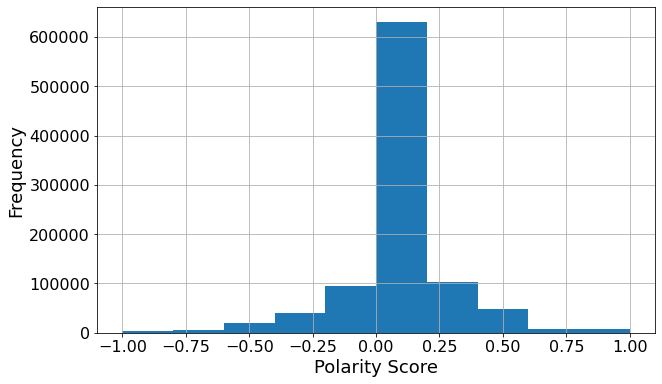

In [17]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./polarity_hist_optimised_dataset.png")

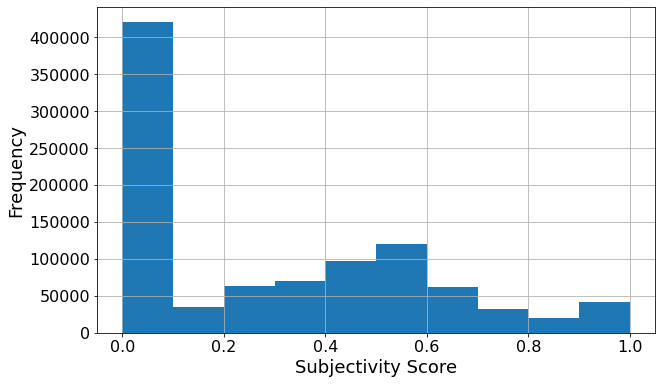

In [18]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./subjectivity_hist_optimised_dataset.png")

In [19]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['description', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

description  \
0                                                                                                                                            @fanniebay Michael Gunner gives an impassioned speech about the evil anti-vaxxers and the importance of everyone taking the "vaccine"  #covid_19 #australia #plandemic https://t.co/I1O7R3TsTV   
1                                                                                                                                                                                                                                                                                       I got the vaccine yesterday and now I feel horrible   
2                                                                                                                                           The compulsory vaccine mandate in Austria is evil  It is however, just another coercion attempt  If say 20% of the population donât get it, what they gonna do, lock up 20% of populace  Nope   
3  ã³ã­ãæ²»çç¨é£²ã¿è¬ãã¨ãããã®ãæ©ããåºåãã¤ã¤ããããé£²ã¿è¬ã§ãã¾ãã¾ãã å±éºã§ããã é£²ã¿è¬ãæãåºããªãã§ãã&lt;m(__)m&gt; Never  get drinking tablet, that`s also very dangerous!!! #æ®ºäººã¯ã¯ãã³ ï¼protest  #vaccine  #ã¯ã¯ãã³æ¤æ»ããã±ã¼ã¸åå¯¾   
4                                                                                                                                                                                                                                           Over a âvaccineâ for a virus with a 99% survival rate!! Disgusting! https://t.co/NjFCzDVMnc   
5                                                                                                                                                                                                                                        ðð·  Horrific side effects from Pfizer #coronavirus #covid19 vaccine. https://t.co/hV55wWi0d9   
6                                                                                                                                                                                                     @NBSaphierMD How can govt mandate a vaccine for kids while it\'s still under EUA and not fully vetted or authorized? Insane thinking.   
7                                            @intelcymru @LetDogsBeDogs @WMcHBg @kev667 @Holbornlolz @ChwisSweed @Docroddy @Numberonerogue @gr3_b1 @rather5ceptical Dear lawd, thatâs horrific.   Iâd like to know âwhyâ the solution does this.   Wonder if itâs the way the body reacts, or because of how the vaccine behaves.   
8                                                                                                                                                                                                                                                                                               moderna booster side effects r fuckin awful   
9                                  ð¨ð¨ TROMBOLOTO â¼ï¸  Muere de #repentinitis Richard Rowe, candidato de Florida, tras pincharse la de Pfizer, la buenað  ðâ ï¸ El miserable covidiota deseaba la muerte a los PURASANGRE   Me nutre q este saco de excrementos muriera lleno de odio #YoNoMeVacuno https://t.co/BPNVdDV1KX   

   polarity  subjectivity  
0      -1.0           1.0  
1      -1.0           1.0  
2      -1.0           1.0  
3      -1.0           1.0  
4      -1.0           1.0  
5      -1.0           1.0  
6      -1.0           1.0  
7      -1.0           1.0  
8      -1.0           1.0  
9      -1.0           1.0

In [20]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['description', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

description  \
0                                                                                                                                                                                                      @Mwam1993_ Add "leaky vaccine" to his list of unknowns also. That said, he\'s the best Oncologist I\'ve had.   
1                                                                                                                                                                                                                        The best part about getting the vaccine is now I can also complain about the unvaccinated.   
2                                                                                                                                                                                                                                                                   @CNBC You guys are great sales team for Pfizer!   
3  PANIEK PANIEK....#gevaccineerden de klos,gaan volop Boosteren zonder te weten of het effectief is, want weten weinig van nieuwe variant. Snapt u het nog??? #ongevaccineerden zijn beter af, hebben perfect werkend natuurlijk #immuunsysteem dat niet door #mRNA #vaccins is aangetast. https://t.co/1QcYr6SVVY   
4                                                               In Pfizer\'s oorspronkelijke test, waren er 4 doden vanwege hartfalen, tegenover slechts 1 in de placebo groep. De studie was te klein voor statistische validatie hiervan maar met wat we nu weten, is het best schokkend. https://t.co/9Dc1Qu40yx   
5   . @BFMTV @JeanCASTEX @vpecresse @EmmanuelMacron @olivierveran  vous serez responsables de ce gÃ©nocide sur nos jeunes et enfants! Nous savons pour les contrats Pfizer, nous savons pour le great reset ! @loichervepublic  @alainhoupert  @ZemmourEric @f_philippot @cab2626 @DIVIZIO1 https://t.co/4tgLgKAhgO   
6     best business card for you just knock me here https://t.co/lYQutpCALj #Metaverse #MANA #MewSuppasit #memecoin #NFTCommunity #NowWeAreBreakingUp #navination #NoMore #NowWeAreBreakingUp #BTC #BTSARMY #Binance #VaccineMandate #CHEMUN #CryptocurrencyNews #XRP #XRP #zonaba #SidNaaz https://t.co/dZRiAZBmVY   
7                                                                                                     I donât understand why yoons are up in arms about vaccine passports, saying all that comply are subservient. And yet seem perfect at ease being subservient to Westminster? ð¤·ââï¸ #VaccinePassports   
8                                                                                                                           IT\'S HAPPENING: The âVaccineâ Is Putting People in the Hospital in Droves; It\'s a Perfectly Designed Plan Where You Can\'t Blame the Jab - Liberty Planet https://t.co/i8uu2QiEyB   
9                                                             .@AliyyaSwaby âs excellent reporting centered in Clayton County, Georgia gives us much-needed nuance about the health department history, infrastructure and its role in the vaccine rollout south of Atlanta : @propublica https://t.co/VYtEFhJMcJ   

   polarity  subjectivity  
0       1.0          0.30  
1       1.0          0.30  
2       1.0          0.75  
3       1.0          1.00  
4       1.0          0.30  
5       1.0          0.75  
6       1.0          0.30  
7       1.0          1.00  
8       1.0          1.00  
9       1.0          1.00

In [21]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['description', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

description  \
0  à¸à¸§à¸à¸à¸µà¸à¸­à¸° à¸à¸­à¸à¸à¸£à¸°à¸à¸²à¸à¸à¸à¸­ mrna à¸à¸²à¸à¸£à¸±à¸à¸à¸²à¸¥ à¸à¹à¹à¸à¸°à¸à¹à¸§à¸à¹à¸¡à¹à¹à¸­à¸²à¹à¸à¹à¸²à¸¡à¸² à¸à¸à¸à¸à¸à¹à¸­à¸à¹à¸«à¹à¹à¸à¸à¸­à¸à¸à¸±à¸à¸£.à¸.à¹à¸­à¸à¸à¸ à¸à¸­à¸§à¸±à¸à¸à¸µà¹à¸à¸µà¹à¹à¸¡à¹à¸à¸­à¸£à¹à¸à¸²à¹à¸£à¸·à¹à¸¡à¸à¸µà¸ à¹à¸ªà¸·à¸­à¸à¸¡à¸²à¸à¸­à¸à¸§à¹à¸²à¹à¸«à¹à¸à¸´à¹à¸à¹à¸¡à¹à¸...   
1                                           ð¸Cert, @republicviatger, he confÃ³s la posiciÃ³; Ã©s el 2n accionista/propietari de Pfizer.  ð¸Controla âNOMÃSâ el 7.18% de les accions ...  ð¸Son 4.890.090 dâaccions d âresâ, amb un preu de mercat de 15.610 milions de dÃ³lars d âresâ.  ð¸Feta lâaclaraciÃ³, no modifica el meu punt... https://t.co/utto3Bx8sL https://t.co/GtEy17a92Z   
2                                                                                                                                                                                                                                                                                                                                                tomei a dose de reforÃ§o da pfizer e parece q meu braÃ§o vai cair   
3                                                                                                                                                                                                                                                                                                                             And trust me I feel conflicted that I let them inject two doses of Moderna  I to me.   
4                                                                                                                                                                                                                                                                               American Heart Association promotes research downplaying COVID vaccine heart risk to youth | Just The News https://t.co/NMOrq9RPB7   
5                                                                                                                                                                                                                                                Ontario announces vaccine passports will remain indefinitely and also will turn into a digital passport âto prevent fraudâ next year. https://t.co/MVGTKx1TNn   
6                                                                                                                                                                                                                                                                                                                                                        Will it?  https://t.co/dEw98LC2d3 https://t.co/ijapHQejV4   
7                                                                                                                                                                                                                                                                                    @AndrewEwing11 Are these issues showing up in people that were vaccinated with Pfizer/Moderna vaccines including the booster?   
8                                                                                                                                                                                                                                                                                           Breakthrough Infections with #SARSCoV2 #OmicronVariant Despite #Booster Dose of mRNA #vaccine  https://t.co/hRzPZYyIX0   
9                                                                                                                      @niinisto Ikiliikkuja YmmÃ¤rrÃ¤tkÃ¶? Nyt keksitÃ¤Ã¤n ikiliikkujaa. TÃ¤ysin jÃ¤rjenvastaista ajatusta syÃ¶tetÃ¤Ã¤n ihmisille. Ota rokote kolmen kuukauden vÃ¤lein, se ei anna suojaa, mutta kun sairastut, saavutat h

In [22]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['description', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

description  \
0                                                                                                                                                                                                               Alright, guess I\'m finally allowed to get a booster. Should I stick with Team Pfizer to go the cocktail route   
1                                                                                                                                                                                                                                                                   maaga ako 2log,,, wtf ka pfizer antok ata side effect puta   
2                                                                                                                                                                                                                    @patka0091 To jest jedynÄ
 ktÃ³rÄ
 rozwaÅ¼am :) ale skoro ma byÄ tylko mRNA to juÅ¼ wiemy o co chodzi ;)   
3                                                                  @SilaStayathome @PeeteMe14 Ich war zu aufgeregt zum schlafen! Impfarm, wenig Kopfschmerzen und ein bisschen schlapp. Heute schwerer Impfarm und einfach nur happy! Mehr Impfarm als mit Pfizer/Biontech. Sag ich mir auch: der Impfarm ist ein Geschenkð¤©   
4                                    Hey .@iowagop .@iagov #Covidkim From a friend in Davenport #Iowa 1/3 The worst thing is taking care of these people who did not get the vaccine. One guy has been in the ICU for two weeks. We donât have any beds for 180 mile ride radius.  If he wouldâve had the vaccine he would   
5                                                                                                                                                   Sorry Linda, the vaccinated can also spread the virus as they can still catch itâ¦.thatâs because itâs not a vaccine, itâs something, but not a vaccine #JeremyVine   
6  @eNCA US court ordered Pfizer to disclose their records and BOOM ð¤¯ 1 in 37 that takes the vaccines ð WILL DIE. This is in Pfizerâs own report &amp; if eNCA is without fear or favour then you will investigate and broadcast these death vaccines ð just imagine 1:37 not even 1:100000 https://t.co/B4dvcnd3Ae   
7                                                                                                                                                                                                                               ReaÃ§Ã£o da pfizer comendo meu cu, eu automaticamente: hm....acho q vou tomar um tererÃ©zin :)   
8                                                                                                                                                                                    @paul_cawley Not necessarily - itâs also a reflection of the fact that while the vaccine reduces transmission, it doesnât prevent it.   
9                                                                                                                                                                                     Only in Florida could this happen ð  Seven doctors contract Covid after attending Florida anti-vaccine summit https://t.co/Cnj2349GQT   

   polarity  subjectivity  
0     0.000           1.0  
1    -0.500           1.0  
2     0.375           1.0  
3     1.000           1.0  
4    -1.000           1.0  
5    -0.500           1.0  
6     0.600           1.0  
7     0.500           1.0  
8     0.000           1.0  
9     0.000           1.0

In [23]:
# let's inspect how many tweets there were with respect to time
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['description']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

In [24]:
# Time-Series Sentiment Analysis
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

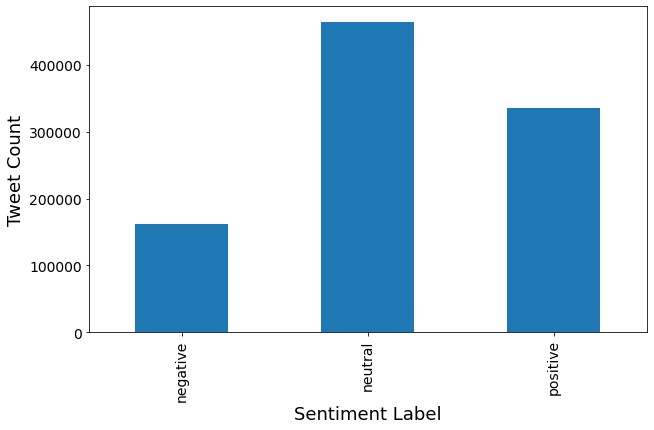

<Figure size 432x288 with 0 Axes>

In [25]:
# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("./sentiment_value_counts_optimised_dataset.png", bbox_inches='tight');

In [26]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweet_count']
timeline = timeline[['date', 'count', 'polarity', 'retweet_count', 'favorite_count', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweet_count  favorite_count  subjectivity
0   2021-11-14   2125  0.053664     121.830588        0.049882      0.315706
1   2021-11-15  34436  0.051352      47.503514        0.080991      0.287547
2   2021-11-16  32066  0.050918      24.261149        0.078276      0.277952
3   2021-11-17  35068  0.051551      24.179309        0.070035      0.280104
4   2021-11-18  27330  0.047577      15.962056        0.067362      0.278690
5   2021-11-19  27934  0.048856      20.885981        0.066156      0.264562
6   2021-11-20  33620  0.045887      55.539976        0.080845      0.268235
7   2021-11-21  28941  0.044694      38.898725        0.088179      0.281391
8   2021-11-22  28249  0.049432      18.030833        0.080463      0.274489
9   2021-11-23  34680  0.051748      79.949683        0.079844      0.275244
10  2021-11-24  33339  0.051291      43.848256        0.091754      0.278955
11  2021-11-25  27565  0.046316      34.940504        0.064829      0.250854
12  2021-11-26  30798  0.056451      29.273784        0.076271      0.291900
13  2021-11-27  29102  0.052556      23.956773        0.072538      0.302520
14  2021-11-28  31472  0.053385      50.337697        0.068823      0.305693
15  2021-11-29  38312  0.057029      25.110279        0.075485      0.286608
16  2021-11-30  32711  0.050973      40.753905        0.069824      0.288838
17  2021-12-01  34254  0.052107      14.603929        0.070444      0.283174
18  2021-12-02  36211  0.048197      37.671951        0.058794      0.290514
19  2021-12-03  36116  0.049117      27.636034        0.069471      0.281725
20  2021-12-04  28263  0.042501      19.568022        0.069349      0.286580
21  2021-12-05  27028  0.047438      42.681034        0.058125      0.298210
22  2021-12-06  30876  0.051239      25.854709        0.065553      0.294621
23  2021-12-07  31053  0.052898      18.677165        0.064664      0.291338
24  2021-12-08  29493  0.052362      10.938935        0.052996      0.285962
25  2021-12-09  29508  0.048843      14.955470        0.061034      0.283476
26  2021-12-10    413  0.064271      35.716707        0.050847      0.297633
27  2021-12-11  29500  0.051168      24.026169        0.068102      0.290812
28  2021-12-12  35651  0.049247      69.883397        0.078287      0.293218
29  2021-12-13  29817  0.054733      16.070933        0.065667      0.304589
30  2021-12-14  36087  0.058623      23.707014        0.055145      0.300444
31  2021-12-15  32742  0.054900      15.855446        0.056655      0.303278
32  2021-12-16   6687  0.047155       4.207866        0.059967      0.282862

In [27]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [28]:
# # Plot tweets over time, color-coded by average subjectivity score
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

In [29]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['description'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['description'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweet_count']
    timeline = timeline[['date', 'count', 'polarity', 'retweet_count', 'favorite_count', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [ ]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
# print(pfizy_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
pfizy_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'pfizer_10_most_negative_tweets.json')
# df.sort_values(by='subjectivity', ascending=True)[['description', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)
# print(pfizy_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
pfizy_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'pfizer_10_most_positive_tweets.json')
print(pfizy_df.shape)
# fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("pfizer_timeseries_polarity_optimised_dataset.png")

In [31]:
sinovac_df, sinovac_timeline = filter_by_vaccy(df, ['sinovac'])
# print(sinovac_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sinovac_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sinovac_10_most_negative_tweets.json')
# print(sinovac_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sinovac_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sinovac_10_most_positive_tweets.json')
print(sinovac_df.shape)
# fig = px.bar(sinovac_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("sinovac_timeseries_polarity_optimised_dataset.png")

In [32]:
sputnik_df, sputnik_timeline = filter_by_vaccy(df, ['sputnik'])
# print(sputnik_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sputnik_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sputnik_10_most_negative_tweets.json')
# print(sputnik_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sputnik_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sputnik_10_most_positive_tweets.json')
print(sputnik_df.shape)
# fig = px.bar(sputnik_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("sputnik_timeseries_polarity_optimised_dataset.png")

In [33]:
astrazeneca_df, astrazeneca_timeline = filter_by_vaccy(df, ['oxford','astrazeneca'])
# print(astrazeneca_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
astrazeneca_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'astrazeneca_10_most_negative_tweets.json')
# print(astrazeneca_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
astrazeneca_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'astrazeneca_10_most_positive_tweets.json')
print(astrazeneca_df.shape)
# fig = px.bar(astrazeneca_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("astrazeneca_timeseries_polarity_optimised_dataset.png")

In [34]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
# print(moderna_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
moderna_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'moderna_10_most_negative_tweets.json')
# print(moderna_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
moderna_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'moderna_10_most_positive_tweets.json')
print(moderna_df.shape)
# fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("moderna_timeseries_polarity_optimised_dataset.png")

In [35]:
sinopharm_df, sinopharm_timeline = filter_by_vaccy(df, ['sinopharm'])
# print(sinopharm_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sinopharm_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sinopharm_10_most_negative_tweets.json')
# print(sinopharm_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
sinopharm_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'sinopharm_10_most_positive_tweets.json')
print(sinopharm_df.shape)
# fig = px.bar(sinopharm_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("sinopharm_timeseries_polarity_optimised_dataset.png")

In [44]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
# print(covaxin_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
covaxin_df.sort_values(by='polarity', ascending=True)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'covaxin_10_most_negative_tweets.json')
# print(covaxin_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10))
covaxin_df.sort_values(by='polarity', ascending=False)[['description', 'pubdate', 'polarity']].reset_index(drop=True).head(n=10).to_json(r'covaxin_10_most_positive_tweets.json')
print(covaxin_df.shape)
# fig = px.bar(covaxin_timeline, x='date', y='count', color='polarity')
# fig.show()
# fig.write_image("covaxin_timeseries_polarity_optimised_dataset.png")

In [45]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])

print(covaxin_df.shape)
fig = px.bar(covaxin_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("covaxin_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(2089, 12)


In [46]:
sinopharm_df, sinopharm_timeline = filter_by_vaccy(df, ['sinopharm'])

print(sinopharm_df.shape)
fig = px.bar(sinopharm_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("sinopharm_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(186, 12)


In [47]:
sputnik_df, sputnik_timeline = filter_by_vaccy(df, ['sputnik'])

print(sputnik_df.shape)
fig = px.bar(sputnik_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("sputnik_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(897, 12)


In [48]:
astrazeneca_df, astrazeneca_timeline = filter_by_vaccy(df, ['oxford','astrazeneca'])

print(astrazeneca_df.shape)
fig = px.bar(astrazeneca_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("astrazeneca_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(3798, 12)


In [49]:
sinovac_df, sinovac_timeline = filter_by_vaccy(df, ['sinovac'])

print(sinovac_df.shape)
fig = px.bar(sinovac_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("sinovac_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(744, 12)


In [43]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])

print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("pfizer_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(173303, 12)


In [37]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()
# fig.savefig("./moderna_timeseries_polarity_optimised_dataset.png", bbox_inches='tight');
fig.write_image("moderna_timeseries_polarity_optimised_dataset.png",engine='kaleido')

/tmp/ipykernel_8603/3124865497.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(57735, 11)


In [38]:
# Word-clouds section
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/am-i-
[nltk_data]     helpful/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
# # Simple word-cloud
# tweet_df = pfizy_df
# words = ' '.join([word for word in tweet_df['description']])
# word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)
#
# fig, ax = plt.subplots(figsize=(12,6))
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis('off')

In [40]:
# Advanced word-cloud (positive, negative and neutral separation)
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)"

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)"

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)"

# Reusable function to generate word clouds
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))

    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words

def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()

    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]

    # Get the top 10% of all words. This may include "misspelled" words
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words
    misspelled = spell.unknown(doc)

    # Accept the correctly spelled words and top_n words
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]

    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])

    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))

    return clean_words

def get_log_likelihood(doc1, doc2):
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }

    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }

    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }

    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

In [41]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

KeyboardInterrupt: 

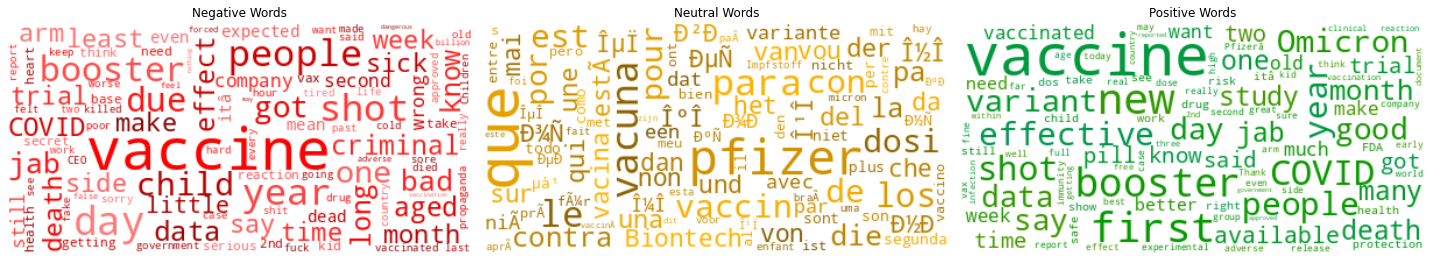

In [56]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizer_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

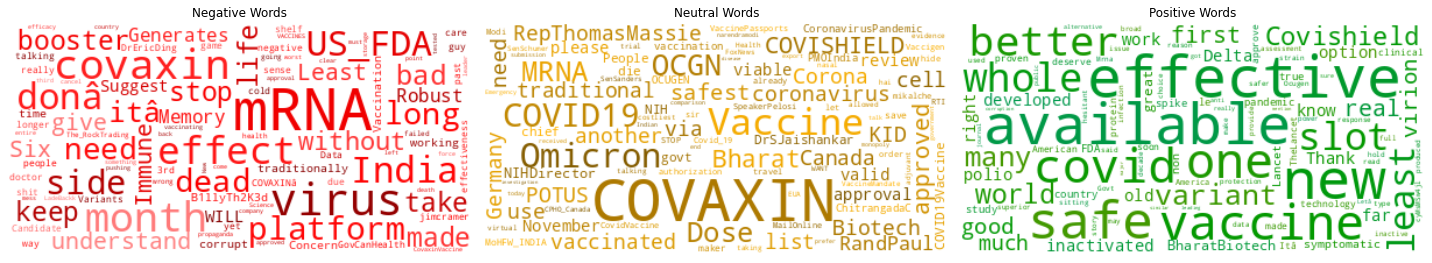

In [50]:
wordcloud_df = covaxin_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("covaxin_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

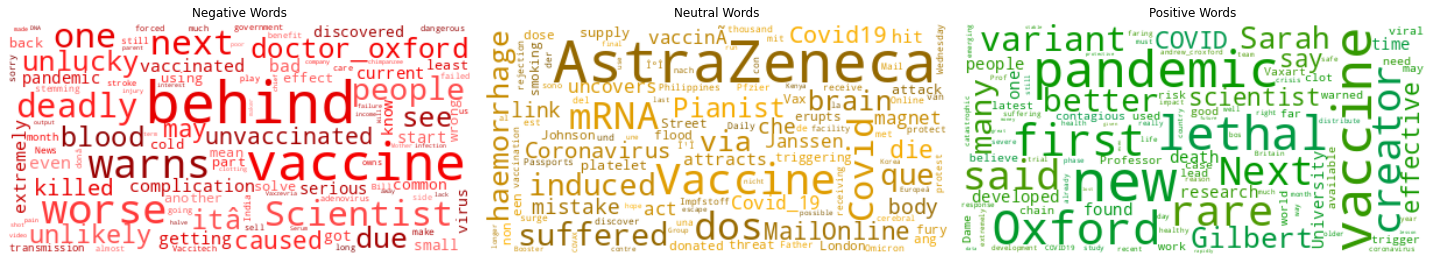

In [51]:
wordcloud_df = astrazeneca_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("astrazeneca_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

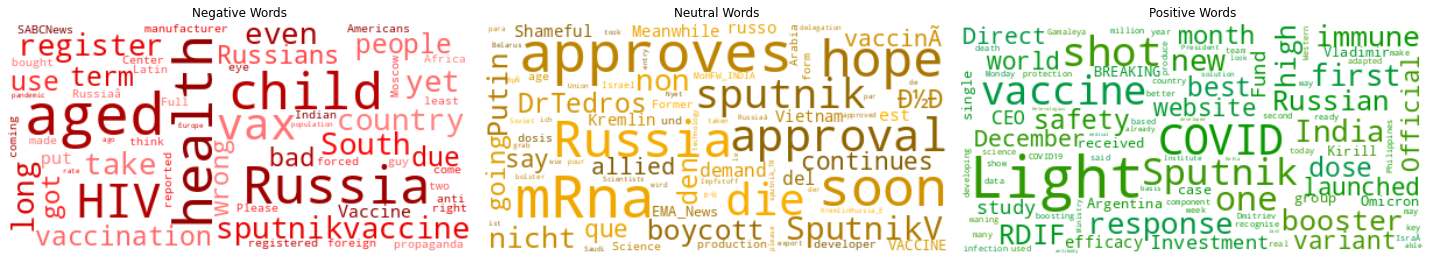

In [52]:
wordcloud_df = sputnik_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sputnik_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

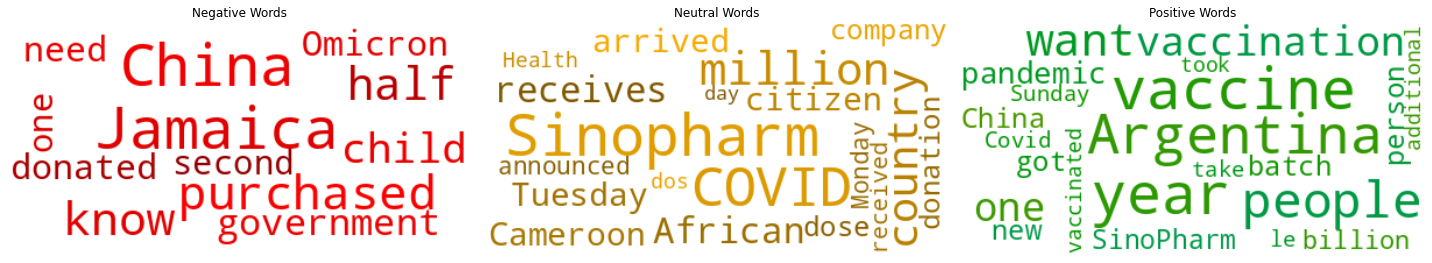

In [53]:
wordcloud_df = sinopharm_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sinopharm_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

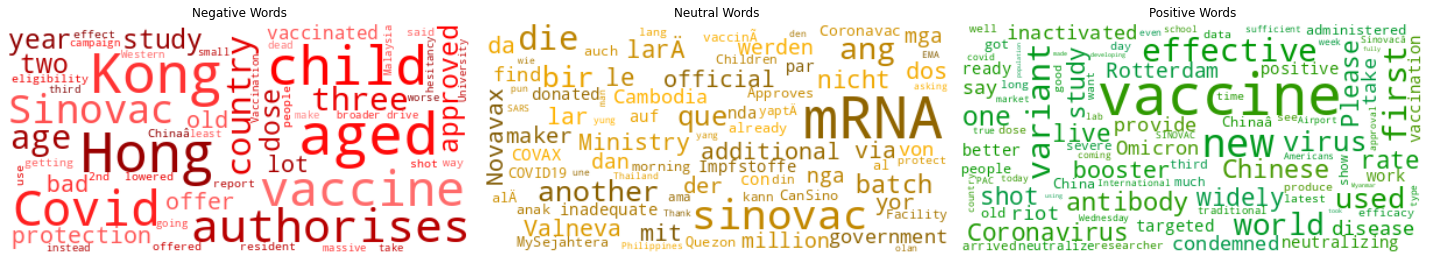

In [54]:
wordcloud_df = sinovac_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sinovac_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")

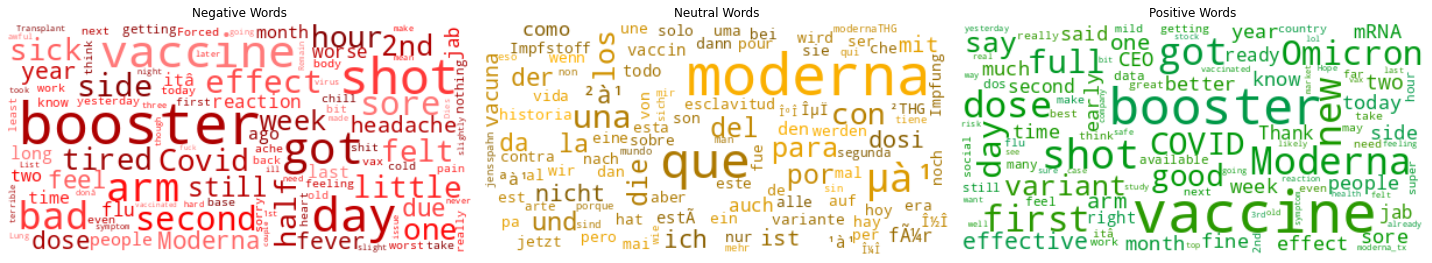

In [55]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.description.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("moderna_sentiment_wordclouds_optimised_dataset.png", bbox_inches="tight")